In [3]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 AWS GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2025
The Emilia Romagna Grand Prix (Italian: Gran Premio dell'Emilia-Romagna) is a Formula One motor racing event held at the Autodromo Internazionale Enzo e Dino Ferrari, often referred to as "Imola" after the town where it is located.[1] The event takes the name "Emilia-Romagna" from the Italian region where the circuit is located. The venue has previously hosted the Italian Grand Prix in 1980, and the San Marino Grand Prix from 1981 to 2006. Source: Wikipedia

## Obtain session information

In [4]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='ITA').query("circuit_short_name == 'Imola'")

,session_key,session_name,date_start,date_end,gmt_offset,session_type,meeting_key,location,country_key,country_code,country_name,circuit_key,circuit_short_name,year
0,9980,Practice 1,2025-05-16T11:30:00+00:00,2025-05-16T12:30:00+00:00,02:00:00,Practice,1260,Imola,13,ITA,Italy,6,Imola,2025


## Free Practice 1
### Obtain setup

In [5]:
practice = libraryDataF1.obtain_information('laps',session_key=9980)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9980)
drivers = libraryDataF1.obtain_information('drivers',session_key=9980)

In [6]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
It seems that Mercedes and Aston Martin are centered on turns while Sauber is centered on straights.

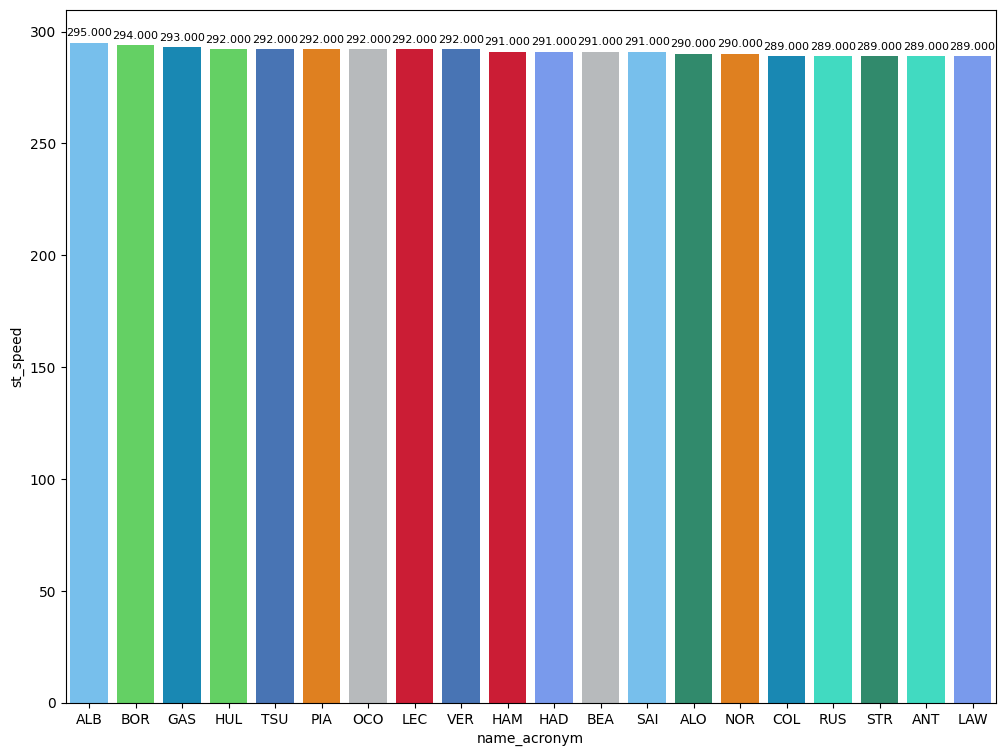

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

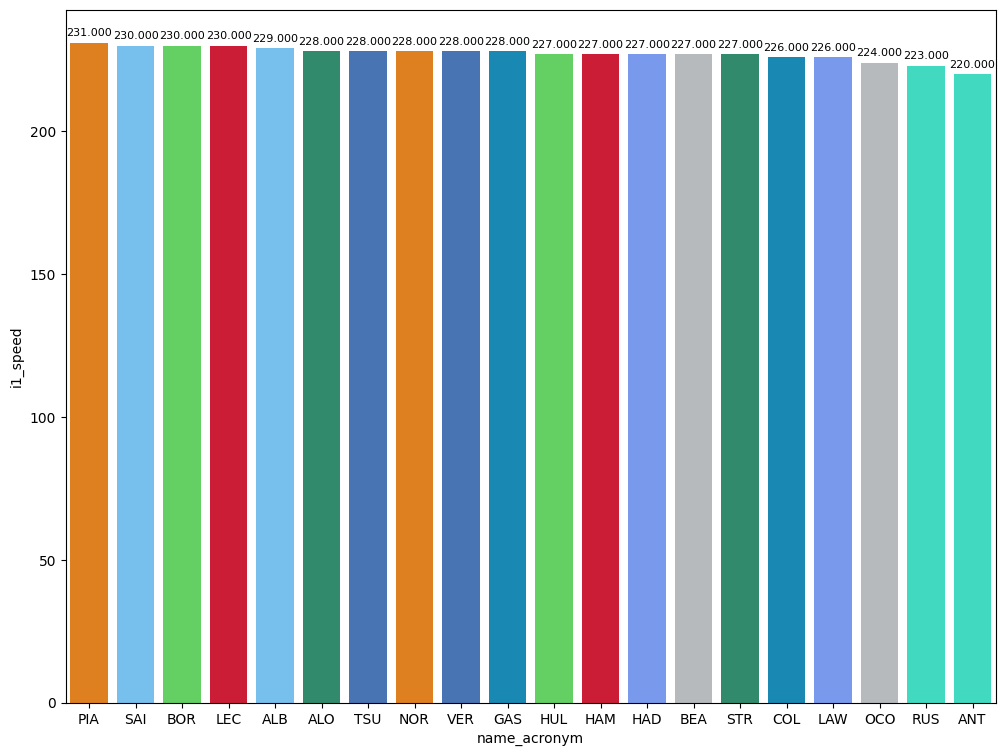

In [8]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

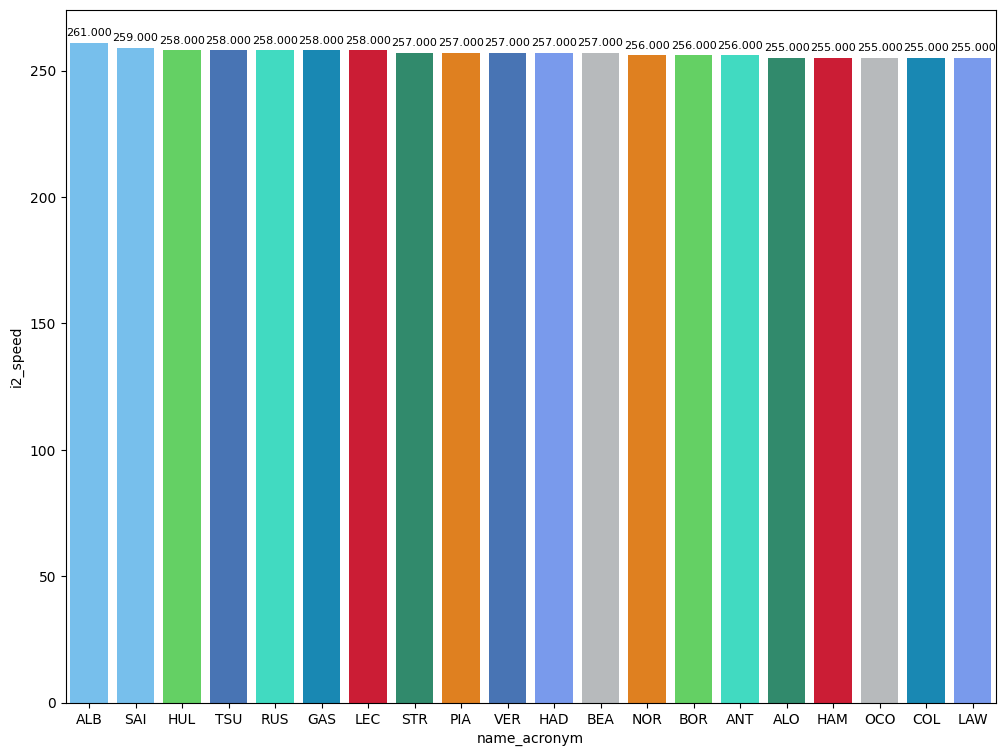

In [9]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [10]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
170,Pierre GASLY,MEDIUM,24.387,26.753,25.767,76.907
216,Oscar PIASTRI,SOFT,24.409,26.496,25.640,76.545


### Deltas
It seems that qualy will be close. Haas and RB could suffer on qualyfing and they will be fighting for entering in Q2. Sauber has had a good performance here and they could fight for Q2. Red Bull should not vave any problem to pass Q3 and Franco without the upgrades could improve in future sessions.

In [11]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


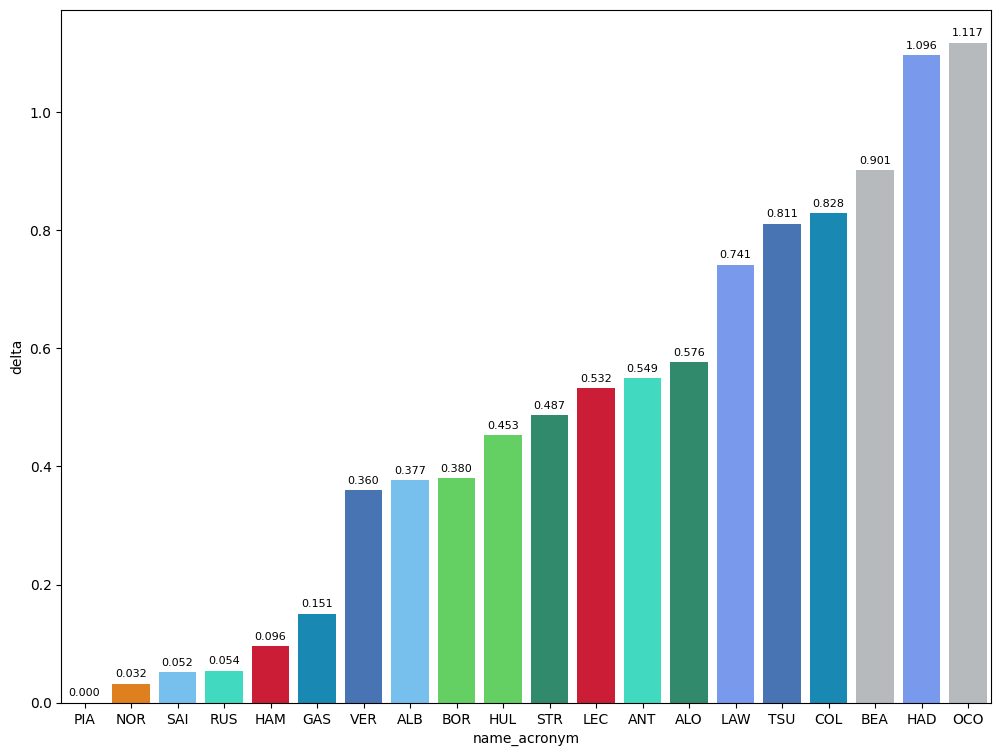

In [12]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector. Also, each sector will be commented.
<br>
<b>Sector 1:</b> Ferrari,Williams and Red Bull are very competitive here. Haas and RB could suffer here.
<br>
<b>Sector 2:</b> McLaren is dominant here while Williams and Aston Martin suffer here.
<br>
<b>Sector 3:</b> Sauber could have its opportunity in sector 3. RB should get a gap up to this sector because they are the slowest.

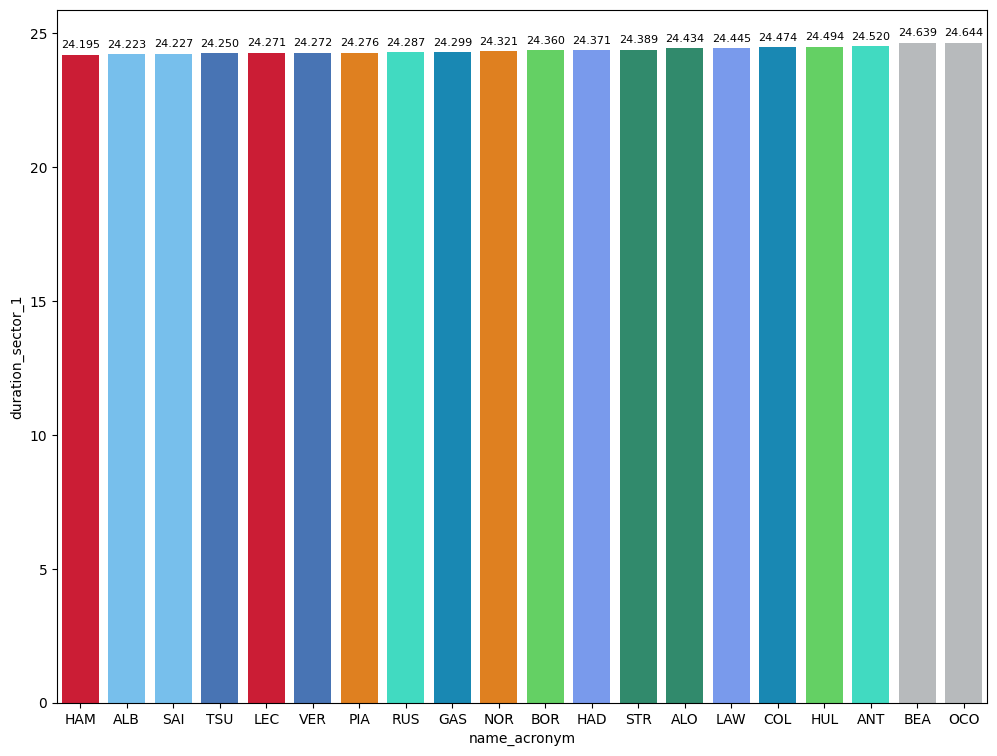

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

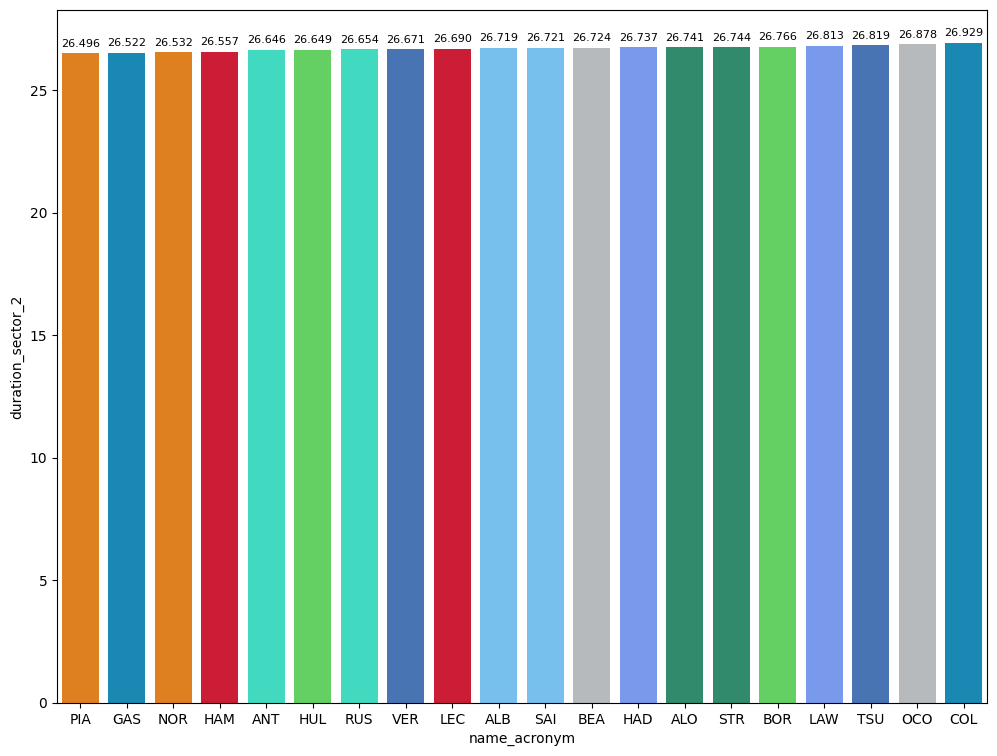

In [14]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

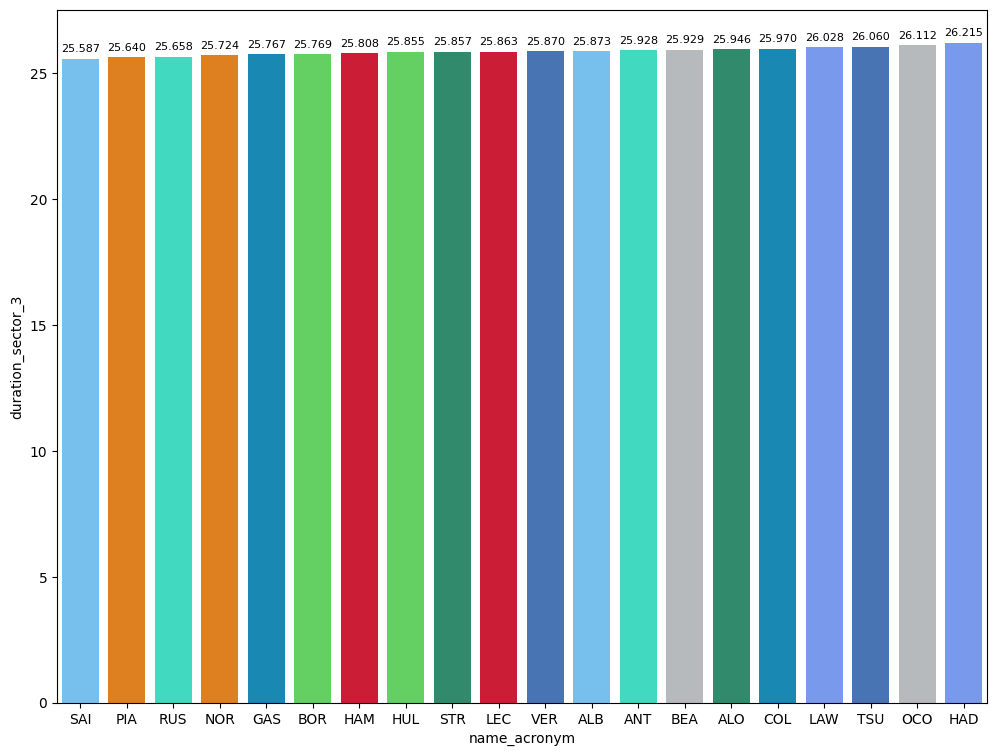

In [15]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [16]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 85").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
SOFT,79.227756
MEDIUM,79.726750


## Free Practice 2
### Obtain setup

In [ ]:
practice = libraryDataF1.obtain_information('laps',session_key=9509)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9509)
drivers = libraryDataF1.obtain_information('drivers',session_key=9509)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 83").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 80
MAXIMUM_SECONDS = 83.3

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables2,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [ ]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [ ]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [ ]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

##### Sorted by sector 1

In [ ]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

##### Sorted by sector 2

In [ ]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

##### Sorted by sector 3

In [ ]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

#### Long runs mean

In [ ]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"INTERMEDIATE","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

In [ ]:
#libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

## Free Practice 3
### Obtain setup

In [ ]:
practice = libraryDataF1.obtain_information('laps',session_key=9510)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9510)
drivers = libraryDataF1.obtain_information('drivers',session_key=9510)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 7, 'FP3')
session.load();

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 83").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9511)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9511)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9511)
drivers = libraryDataF1.obtain_information('drivers',session_key=9511)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 7, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [ ]:
qualyfing = qualyfing.drop(12)
qualyfing = qualyfing.drop(33)
qualyfing = qualyfing.drop(118)
qualyfing = qualyfing.drop(203)

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 74.746 seconds (1.14.746= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (79.97 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 79.97822")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole. In this case, this happened with Leclerc taking the best time but not taking the pole because his cest time in Q3 was not the best time of the session.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-05-18T14:25:00+00:00'"
maximumDateQ2 = "date_start <'2024-05-18T14:48:00+00:00' and date_start >'2024-05-18T14:25:00+00:00'"
maximumDateQ3 = "date_start >'2024-05-18T14:48:00+00:00'"

### Qualyfing 1
In this session the surprise came from Aston Martin with Fernando that knocked-out in Q1. The rest of the drivers were expected to be knocked-out

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
It was a close battle to pass to Q2 with less of 3 tenths among the driver at risk and Magnussen. Until the third sector, P15 was disputed beetween Hamilton and Bottas being Bottas 0.040 miliseconds better than Hamilton in the second sector.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.
As we can see in the last table, Hamilton had a good pace in the first sector but he suffered a lot in the second losing more than 1 tenth in this sector

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2
In this session, both Alpine,Albon,Stroll and Perez knocked out. Perez was so close to make it through Q3 but his first sector was bad.

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
RB had a good pace being able to pass to Q3 eliminating Perez in Q2

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.
Both Mercedes would have suffered for their third sector losing 1.5 tenths.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
As we saw in the free practices, pole position was going to be very close among Red Bull, Ferrari and McLaren. Verstappen took the pole but, as other grand prix, he suffered a lot to get it. His first sector, with two tenths of difference compared to his rivals, afforded to Verstappen to take the pole.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9515)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9515)
drivers = libraryDataF1.obtain_information('drivers',session_key=9515)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace
General explanation
Explanation per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Long runs

In [ ]:
MINIMUN_SECONDS = 78
MAXIMUM_SECONDS = 85

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9515)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration